In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

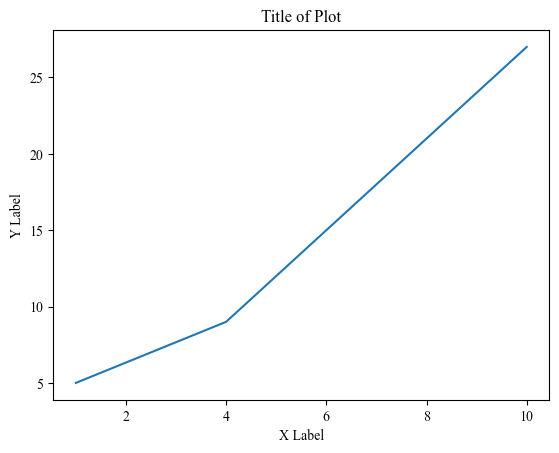

In [3]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

x = [1, 4, 10]
y = [5, 9, 27]

#create line plot
plt.plot (x, y)

#add title and axis labels
plt.title('Title of Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

#display plot
plt.show() 

In [6]:
import pandas as pd

gazeta = pd.read_csv('preprocessed-gazeta.csv')

In [9]:
gazeta_timestamps = gazeta.publication_date.to_list()
gazeta['result_clean_text'] = gazeta['result_clean_text'].astype(str)
gazeta_posts = gazeta.result_clean_text.to_list()

In [10]:
from bertopic import BERTopic

topic_model = BERTopic(language="russian", verbose=True)
topics, probs = topic_model.fit_transform(gazeta_posts)

c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-20 06:50:52,299 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 2317/2317 [39:59<00:00,  1.04s/it]
2024-05-20 07:31:02,870 - BERTopic - Embedding - Completed ✓
2024-05-20 07:31:02,871 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-20 07:31:47,423 - BERTopic - Dimensionality - Completed ✓
2024-05-20 07:31:47,427 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-20 07:31:51,208 - BERTopic - Cluster - Completed ✓
2024-05-20 07:31:51,227 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-20 07:32:06,087 - BERTopic - Representation - Completed ✓


In [11]:
topic_model.save("gazeta_model")

2024-05-20 07:36:23,091 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [13]:
topics_over_time = topic_model.topics_over_time(gazeta_posts, gazeta_timestamps, datetime_format="mixed", nr_bins=20)

20it [01:15,  3.77s/it]


In [14]:
topics_over_time = topic_model.topics_over_time(gazeta_posts, gazeta_timestamps,
                                                datetime_format="mixed",
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [01:16,  3.81s/it]


In [15]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [16]:
topics_over_time["Year"] = topics_over_time["Timestamp"].astype(str).str[:4].astype(int)

In [17]:
selected_topics = topics_over_time[topics_over_time['Topic'] >= 0]

In [18]:
topic_counts = selected_topics.groupby("Name")["Frequency"].sum()

# Выбор топ-20 тем
top_20_topics = topic_counts.nlargest(20).index

grouped_lenta = selected_topics.groupby(["Year", "Name"])["Frequency"].sum().unstack(fill_value=0)

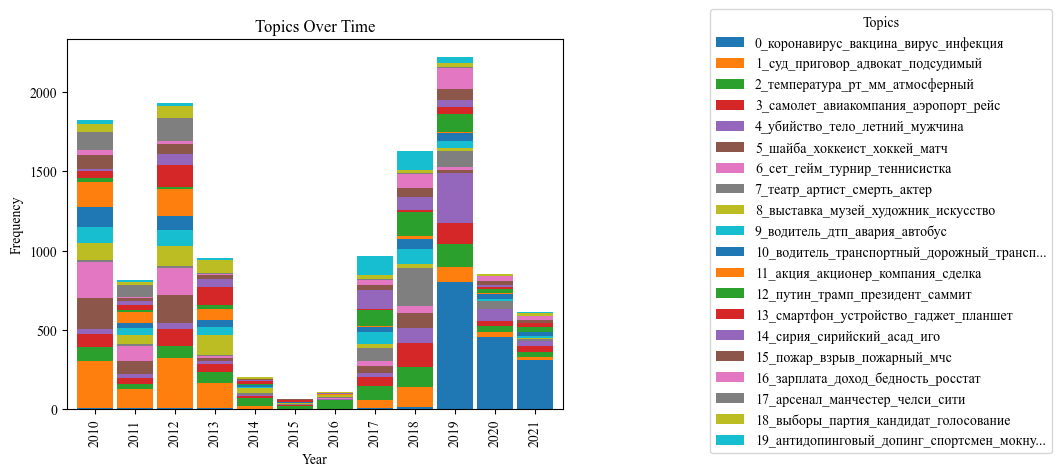

In [26]:
# Фильтрация данных по топ-20 темам
filtered_data = grouped_lenta[top_20_topics]

# Построение графика
filtered_data.plot(kind="bar", stacked=True, width=0.9, align='center')

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Topics Over Time")
plt.legend(title="Topics", loc="upper right", bbox_to_anchor=(2, 1.1))
plt.savefig("Gazeta_BERTopic-DTM.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
#plt.show()